# Baseline Model
## Using past 6 games to the moving average
( Check 01_data_base_development.ipynb to change)

As we have our that ready to train, we just need to try to adjust the cols that we have, so we can train our model better. We will start with a simple logistic regression training on the data to set a baselinemodel.

In [1]:
import pandas as pd

In [2]:
#loading our base data
data_base = pd.read_pickle('data_base.pkl')
data_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5999 entries, 0 to 5998
Columns: 269 entries, date to away_rolling_opponent_Total
dtypes: float64(264), int64(1), object(4)
memory usage: 12.4+ MB


In [3]:
data_base.iloc[:5, 0:7]

,date,home_team,away_team,season,home_win,home_rolling_fg,home_rolling_fga
0,2017-11-05 00:00:00.000000,CLE,ATL,2017-18,0,38.333333,85.833333
1,2017-11-05 00:00:00.000000,NYK,IND,2017-18,1,41.666667,87.666667
2,2017-11-07 00:00:00.000000,DEN,BRK,2017-18,1,40.500000,85.500000
3,2017-11-07 00:00:00.000000,NYK,CHO,2017-18,1,43.000000,86.666667
4,2017-11-07 00:00:00.000000,UTA,PHI,2017-18,0,36.500000,82.833333


In [4]:
data_base.columns.to_list()

['date',
 'home_team',
 'away_team',
 'season',
 'home_win',
 'home_rolling_fg',
 'home_rolling_fga',
 'home_rolling_fg%',
 'home_rolling_3p',
 'home_rolling_3pa',
 'home_rolling_3p%',
 'home_rolling_ft',
 'home_rolling_fta',
 'home_rolling_ft%',
 'home_rolling_orb',
 'home_rolling_drb',
 'home_rolling_trb',
 'home_rolling_ast',
 'home_rolling_stl',
 'home_rolling_blk',
 'home_rolling_tov',
 'home_rolling_pf',
 'home_rolling_pts',
 'home_rolling_ts%',
 'home_rolling_efg%',
 'home_rolling_3par',
 'home_rolling_ftr',
 'home_rolling_orb%',
 'home_rolling_drb%',
 'home_rolling_trb%',
 'home_rolling_ast%',
 'home_rolling_stl%',
 'home_rolling_blk%',
 'home_rolling_tov%',
 'home_rolling_usg%',
 'home_rolling_ortg',
 'home_rolling_drtg',
 'home_rolling_fg_max',
 'home_rolling_fga_max',
 'home_rolling_fg%_max',
 'home_rolling_3p_max',
 'home_rolling_3pa_max',
 'home_rolling_3p%_max',
 'home_rolling_ft_max',
 'home_rolling_fta_max',
 'home_rolling_ft%_max',
 'home_rolling_orb_max',
 'home_rolli

Creating our list of information columns. Note that these variables are all present before a game actually happens. 

In [5]:
info_cols = ['date',
 'home_team',
 'away_team',
 'season',
 'home_win' ]


Creating our feature set and target series:

In [6]:
X = data_base.loc[:, ~data_base.columns.isin(info_cols)] # excluding info_cols
y = data_base['home_win']

print(f'Feature set shape: {X.shape}, target series shape: {y.shape}')

Feature set shape: (5999, 264), target series shape: (5999,)


In [7]:
X.head()

,home_rolling_fg,home_rolling_fga,home_rolling_fg%,home_rolling_3p,home_rolling_3pa,home_rolling_3p%,home_rolling_ft,home_rolling_fta,home_rolling_ft%,home_rolling_orb,...,away_rolling_opponent_drb%_max,away_rolling_opponent_trb%_max,away_rolling_opponent_ast%_max,away_rolling_opponent_stl%_max,away_rolling_opponent_blk%_max,away_rolling_opponent_tov%_max,away_rolling_opponent_usg%_max,away_rolling_opponent_ortg_max,away_rolling_opponent_drtg_max,away_rolling_opponent_Total
0,38.333333,85.833333,0.446833,9.166667,30.833333,0.289167,19.333333,24.000000,0.803167,9.666667,...,39.733333,24.250000,40.600000,4.966667,9.466667,34.283333,27.466667,153.833333,104.666667,109.000000
1,41.666667,87.666667,0.476000,8.666667,27.333333,0.313833,17.166667,21.333333,0.795000,11.500000,...,38.383333,26.300000,47.133333,5.516667,17.716667,30.066667,33.066667,178.000000,121.000000,111.500000
2,40.500000,85.500000,0.473333,9.666667,27.666667,0.347833,16.666667,24.000000,0.693833,11.166667,...,33.783333,23.616667,33.050000,6.516667,9.566667,45.466667,32.933333,168.666667,111.333333,116.666667
3,43.000000,86.666667,0.499833,9.333333,26.500000,0.349333,15.666667,19.666667,0.787667,10.500000,...,41.950000,29.016667,40.916667,6.266667,9.150000,32.133333,36.916667,164.166667,110.166667,107.000000
4,36.500000,82.833333,0.446333,10.666667,30.166667,0.356667,16.166667,19.500000,0.822167,9.500000,...,38.233333,25.333333,43.900000,6.200000,8.316667,39.966667,31.816667,158.166667,112.833333,108.000000


Creating our training and validating matrix

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Import a simple logistic regression model and getting results, this will be our baseline model and set.

In [9]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
preds = logreg.predict(X_test)

Getting our predictions results

Accuracy: 72.3%
Classification Report:               precision    recall  f1-score   support

           0       0.71      0.66      0.68       541
           1       0.73      0.78      0.76       659

    accuracy                           0.72      1200
   macro avg       0.72      0.72      0.72      1200
weighted avg       0.72      0.72      0.72      1200



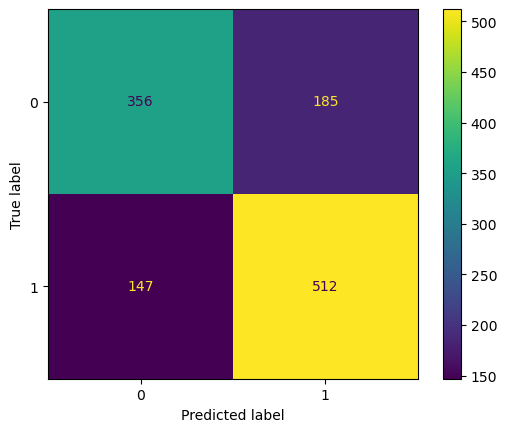

In [10]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report
from matplotlib import pyplot as plt

# Accuracy
print(f'Accuracy: {accuracy_score(y_test, preds):.1%}')
# Classification Report
print(f'Classification Report: {classification_report(y_test, preds)}')
# Confusion Matrix
#cm = confusion_matrix(y_test, preds, labels = logreg.classes_)
#ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logreg.classes_).plot()
ConfusionMatrixDisplay.from_estimator( logreg, X_test, y_test)



We can see that we got 70,4% accuracy ust from the baseline model. To give more robustness to this stat, we gonna train and validate in 5 batches, and get the mean accuracy.

In [11]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X, y, scoring='accuracy', cv=5)
print(f'Cross-Validation Accuracy Scores: {scores.mean():.1%}')

Cross-Validation Accuracy Scores: 74.3%


Pretty good results considering that this is a baseline model. Lets put this in a wider perspective:

According wih [1], these are some results of predictions and sources:

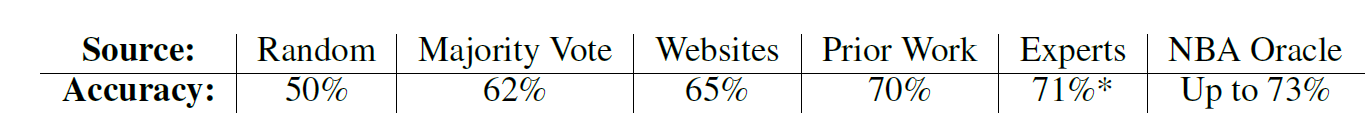

Where NBA Oracle were their best performing model.

[1] M. Beckler, H. Wang, M. Papamichael. 'NBA Oracle', Pittsburgh, 2013.




After this first superficial look, we are going select the most valuable features with sklearn sequential feature selection, using for this the Linear Support Vector Classification to get the first 40 atributes that are more significative.

Info columns are the columns that present information of the next game to be predicted. So they will be used to group our features, so when performing rolling averages, will do it accordinly with these groups.


As we have many columns, we will run the feature selection method to extract only features that will be meaningful for training the model